In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Jan19_noTune"

In [3]:
##Regular tune prior true and smearcept to be used


#prior true
#"nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv"

In [4]:
####Load in noTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_angleDiff_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[ 1.97469775  2.86994898  3.61273761  7.33264029  8.16744678  9.91830991
 11.73528837 19.95518279 35.56991028 97.83153406]

[ 49.64245339  40.01809557  49.75596642  58.6782979   72.88129816
 110.42722404 154.26861349 235.35534592 425.82583638 765.28135408]


In [5]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Jan19" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_angleDiff_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_angleDiff_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[ 1.125004    1.3636628   1.93697273  4.85652612  3.56279372  4.10128825
  3.68560034  6.46732686 11.84780336 40.86414887]

[ 21.63167491  13.5363924   12.56102384  13.12996887  18.81793676
  36.03563436  54.47993438  87.76891513 173.57981138 357.68668115]



In [6]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[ 0.84969374  1.50628619  1.67576487  2.47611417  4.60465306  5.81702166
  8.04968803 13.48785593 23.72210692 56.96738519]

[ 28.01077848  26.48170316  37.19494258  45.54832904  54.0633614
  74.39158969  99.78867912 147.58643078 252.246025   407.59467292]


In [7]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[  0.84969374   1.50628619   1.67576487   2.47611417   4.60465306
   5.81702166   8.04968803  13.48785593  23.72210692  56.96738519
  28.01077848  26.48170316  37.19494258  45.54832904  54.0633614
  74.39158969  99.78867912 147.58643078 252.246025   407.59467292]
20


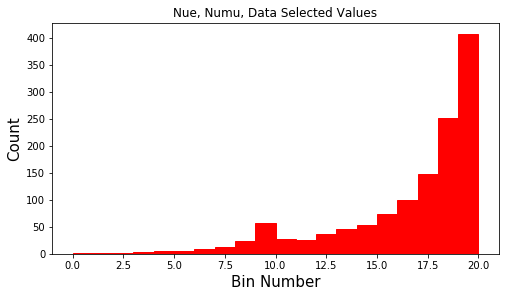

In [8]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_noTune_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

In [9]:
np.savetxt("data_signal_MC_noTune_input_angleDiff_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19


In [10]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Jan19_noTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_angle_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_angle_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

[0.41711307 0.31676658 1.11212216 1.85879411 1.19625285 1.58492908
 0.95533568 1.32165825 1.70463077 6.00691692]

[ 10.61481165   8.59381006  12.49018321  12.77549112  16.69049097
  30.9294556   41.51663418  59.41274986  94.7784572  164.07400228]



In [11]:
####The regular tune bkg stat uncertainties

ending = "Jan19" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_angle_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_angle_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[0.40361937 0.37869795 1.09248271 1.87785601 1.11476086 1.52469818
 0.87277381 1.16674332 1.48117631 5.47838269]

[ 5.56527103  3.31864546  4.92737201  3.85884493  6.41568387 16.33395278
 23.07504552 32.3956967  55.28743915 96.00956256]



In [12]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[ 0.82073244  0.69546453  2.20460487  3.73665012  2.3110137   3.10962725
  1.82810948  2.48840158  3.18580708 11.48529961]

[ 16.18008268  11.91245552  17.41755522  16.63433605  23.10617484
  47.26340837  64.5916797   91.80844655 150.06589635 260.08356484]

[  0.82073244   0.69546453   2.20460487   3.73665012   2.3110137
   3.10962725   1.82810948   2.48840158   3.18580708  11.48529961
  16.18008268  11.91245552  17.41755522  16.63433605  23.10617484
  47.26340837  64.5916797   91.80844655 150.06589635 260.08356484]


In [13]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [15]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_angle_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[ 1.12541015e-01  1.48068184e-01  1.09394307e-01  3.07725420e-01
   2.97852240e-01  3.81385936e-01  4.74539623e-01  8.09239606e-01
   1.43405281e+00  3.62248685e+00  2.10315500e+00  1.58623996e+00
   1.82558886e+00  2.15999353e+00  2.43783675e+00  3.71948071e+00
   5.51494073e+00  8.22933880e+00  1.54646808e+01  2.73859343e+01]
 [ 1.48068184e-01  2.82167611e-01  1.71156052e-01  4.46029479e-01
   4.11662676e-01  6.20232531e-01  7.23996931e-01  1.21375262e+00
   2.02634650e+00  4.08047788e+00  3.35894295e+00  2.63847131e+00
   2.99780115e+00  3.43430124e+00  3.93496094e+00  5.25489922e+00
   7.54437135e+00  1.07375957e+01  1.92085010e+01  2.78367101e+01]
 [ 1.09394307e-01  1.71156052e-01  1.55012162e-01  3.77710133e-01
   3.56319888e-01  4.93353343e-01  6.30578001e-01  1.02144143e+00
   1.73163435e+00  4.06785915e+00  2.75530792e+00  2.20883877e+00
   2.51243614e+00  2.87854591e+00  3.38108038e+00  4.52084965e+00
   6.82028776e+00  9.72507231e+00  1.78851822e+01  2.93992536e+01]
 [ 3.07

In [16]:
# Load in the blockwise nuwrounisim cov matrix

nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_angle_comb_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 2.52315197e+00 -1.84609493e+00 -4.51394000e-01  1.31951410e+00
  -2.37122897e+00 -4.16828314e+00  2.09298895e+00 -5.52360196e+00
  -1.57246020e-01  2.53291392e+01  3.76346656e+00 -3.13799232e+01
  -3.98948536e+01 -1.20499489e+00 -6.40830006e+00 -4.88277428e+01
  -4.46368816e+00 -5.84327336e+01  8.96311999e+00  7.99322580e+01]
 [-1.84609493e+00  1.35071789e+00  3.30267930e-01 -9.65438594e-01
   1.73493862e+00  3.04977524e+00 -1.53136091e+00  4.04141080e+00
   1.15050970e-01 -1.85323738e+01 -2.75358625e+00  2.29595038e+01
   2.91895566e+01  8.81649221e-01  4.68871096e+00  3.57254140e+01
   3.26591193e+00  4.27530228e+01 -6.55797614e+00 -5.84834122e+01]
 [-4.51394000e-01  3.30267930e-01  8.07547647e-02 -2.36062177e-01
   4.24214849e-01  7.45709345e-01 -3.74437476e-01  9.88177017e-01
   2.81314446e-02 -4.53140421e+00 -6.73287320e-01  5.61389454e+00
   7.13722273e+00  2.15574595e-01  1.14645025e+00  8.73532409e+00
   7.98557550e-01  1.04536650e+01 -1.60350967e+00 -1.42999479e+01]
 [ 1.31

In [17]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err + nuWro_unisim

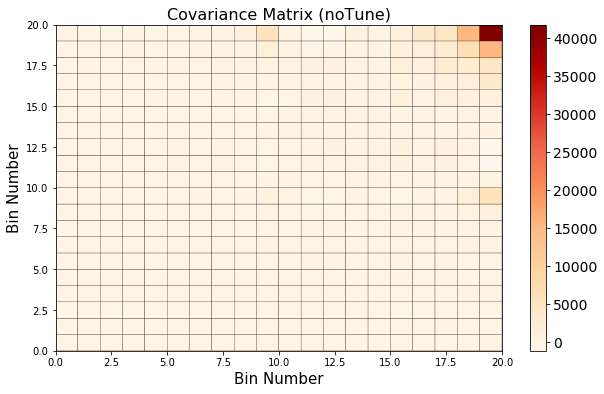

In [18]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance Matrix (noTune)', fontsize=16)


plt.savefig("data_covmat_MC_noTune_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [19]:
np.savetxt("data_covmat_MC_noTune_input_angleDiff_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [27]:
ending

'Jan19'